<a href="https://colab.research.google.com/github/Yagwar/ASAG_Test/blob/master/clasiff_eval_items_compare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use("seaborn")
import seaborn as sns
import pprint, pickle

from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from scipy.stats.stats import pearsonr
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')
drive_path = 'gdrive/My Drive/maestria ucatolica/Proyecto de grado/Analisis/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


## Load data


In [0]:
train_questions=pd.read_csv(drive_path+"train_questions.csv", sep=";",index_col=0)
train_ref_ans=pd.read_csv(drive_path+"train_ref_ans.csv", sep=";",index_col=0)
train_stud_ans=pd.read_csv(drive_path+"train_stud_ans.csv", sep=";",index_col=0)
test_questions=pd.read_csv(drive_path+"test_questions.csv", sep=";",index_col=0)
test_ref_ans=pd.read_csv(drive_path+"test_ref_ans.csv", sep=";",index_col=0)
test_stud_ans=pd.read_csv(drive_path+"test_stud_ans.csv", sep=";",index_col=0)

train_answers=pd.read_csv(drive_path+"train_answers.csv", sep=";",index_col=0)
test_answers=pd.read_csv(drive_path+"test_answers.csv", sep=";",index_col=0)

In [0]:
test_divs=['TEST Beetle Unseen Answers',
           'TEST sciEntsBank Unseen Answers']
test_answers=test_answers[(test_answers['dtset'] == "TEST Beetle Unseen Answers") | (test_answers['dtset'] == "TEST sciEntsBank Unseen Answers")]

In [0]:
# complete_texts=pd.concat([train_questions.question,
#                           train_ref_ans.ref_ans,
#                           train_stud_ans.st_answ,
#                           test_questions.question,
#                           test_ref_ans.ref_ans,
#                           test_stud_ans.st_answ], 
#                          ignore_index=True)
train_texts=pd.concat([train_questions.question,
                       train_ref_ans.ref_ans,
                       train_stud_ans.st_answ],
                      ignore_index=True)
test_texts=pd.concat([test_questions.question,
                      test_ref_ans.ref_ans,
                      test_stud_ans.st_answ], 
                      ignore_index=True)

## Preprocessing

In [0]:
text_tfidf= Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer())
])

In [0]:
txt_tfidf=text_tfidf.fit(train_texts) #  Matriz tf-idf con textos de train solamente
# txt_tfidf=text_tfidf.fit(complete_texts) # Matriz tf-idf con textos de train y test

In [0]:
train_preg_ref_res_X=[]
for ith_ans in range(train_answers.st_answ.shape[0]):
    out_array=np.array([
        txt_tfidf.transform([train_answers.question[ith_ans]]).toarray()[0],
        txt_tfidf.transform([train_answers.ref_ans[ith_ans]]).toarray()[0],
        txt_tfidf.transform([train_answers.st_answ[ith_ans]]).toarray()[0]
    ]).ravel()
    train_preg_ref_res_X.append(out_array)
train_preg_ref_res_X=np.array(train_preg_ref_res_X)
train_preg_ref_res_y=train_answers.st_ans_calif

test_preg_ref_res_X=[]
for ith_ans in range(test_answers.st_answ.shape[0]):
    out_array=np.array([
        txt_tfidf.transform([test_answers.question.iloc[ith_ans]]).toarray()[0],
        txt_tfidf.transform([test_answers.ref_ans.iloc[ith_ans]]).toarray()[0],
        txt_tfidf.transform([test_answers.st_answ.iloc[ith_ans]]).toarray()[0]
    ]).ravel()
    test_preg_ref_res_X.append(out_array)
test_preg_ref_res_X=np.array(test_preg_ref_res_X)
test_preg_ref_res_y=test_answers.st_ans_calif

![Baselines](https://raw.githubusercontent.com/Yagwar/ASAG_Test/master/baselines.png)

## Classifiers

In [0]:
train_X=train_preg_ref_res_X;print(train_X.shape)
train_y=train_preg_ref_res_y;print(train_y.shape)
test_X=test_preg_ref_res_X;print(test_X.shape)
test_y=test_preg_ref_res_y;print(test_y.shape)

(22167, 8931)
(22167,)
(2402, 8931)
(2402,)


In [0]:
names = [
    "Nearest Neighbors", 
#     "Linear SVM", 
    "RBF SVM", 
#     "Gaussian Process",
#     "Decision Tree", 
    "Random Forest", 
#     "Neural Net", 
    "AdaBoost",
    "Naive Bayes", 
    "QDA"]

names_short = [
    "KNN", 
#     "L_SVM", 
    "RBF_SVM", 
#     "GaussSVM",
#     "Dec_Tree", 
    "Rand_Forest", 
#     "ANN", 
    "AdaBoost",
    "Naive_Bayes", 
    "QDA"]



In [0]:
classifiers = [
    KNeighborsClassifier(3,n_jobs=-1),
#     SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
#     GaussianProcessClassifier(1.0 * RBF(1.0)),
#     DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=15, n_estimators=500,n_jobs=-1),
#     MLPClassifier(learning_rate="adaptive",hidden_layer_sizes=(1000,100)),
    AdaBoostClassifier(n_estimators=500),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

In [0]:
# iterate over classifiers
for name, clf in zip(names_short, classifiers):
    print("trainning "+name)
    clf.fit(train_X, train_y)
    print ("saving "+name+" trained model")
    output = open(drive_path+name+'trained.pkl', 'wb')
    pickle.dump(clf, output)# Pickle dictionary using protocol 0.
#     pickle.dump(clasif_model, output)# Pickle dictionary using protocol 0.
    output.close()
    
    print("***********************************************************************")

trainning KNN
saving KNN trained model
***********************************************************************
trainning RBF_SVM
saving RBF_SVM trained model
***********************************************************************
trainning Rand_Forest
saving Rand_Forest trained model
***********************************************************************
trainning AdaBoost
saving AdaBoost trained model
***********************************************************************
trainning Naive_Bayes
saving Naive_Bayes trained model
***********************************************************************
trainning QDA


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


saving QDA trained model
***********************************************************************


In [0]:
clasifiers_trained=[]

for name in (names_short):
  pkl_file = open(drive_path+name+'trained.pkl', 'rb')
  clf = pickle.load(pkl_file)
  pkl_file.close()
  pprint.pprint(clf)
  clasifiers_trained.append(clf)
  print("***********************************************************************")

# pkl_file = open(drive_path+'clasifiers_trained_b.pkl', 'rb')
# clasifiers_trained = pickle.load(pkl_file)
# pkl_file.close()

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
           weights='uniform')
***********************************************************************
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=2, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
***********************************************************************
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
****************************************************

In [0]:
# train_X=train_preg_ref_res_X;print(train_X.shape)
# train_y=train_preg_ref_res_y;print(train_y.shape)
# test_X=test_preg_ref_res_X;print(test_X.shape)
# test_y=test_preg_ref_res_y;print(test_y.shape)

In [0]:
# iterate over classifiers
for name in (names_short):
  pkl_file = open(drive_path+name+'trained.pkl', 'rb')
  clf = pickle.load(pkl_file)
  pkl_file.close()
  pprint.pprint(clf)
    
  train_answers[name]=clf.predict(train_X);print("train items predicted")
  test_answers[name]=clf.predict(test_X);print("test items predicted")

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
           weights='uniform')
train items predicted
test items predicted
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=2, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
train items predicted
test items predicted
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
train items predicted
test items predicted
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
      

In [0]:
train_answers.to_csv(drive_path+'train_answers_2.csv')
test_answers.to_csv(drive_path+'test_answers_2.csv')

## Evaluate predictions

In [0]:
train_answers=pd.read_csv(drive_path+'train_answers_2.csv',index_col=0)
test_answers=pd.read_csv(drive_path+"test_answers_2.csv",index_col=0)

train_diffs=pd.read_csv(drive_path+'diffs_train.csv',index_col=0);train_diffs.columns=["IRT_difficulty"]#test_results
test_diffs=pd.read_csv(drive_path+"diffs_test.csv",index_col=0);test_diffs.columns=["IRT_difficulty"]#test_results

In [14]:
predictors=list(train_answers.iloc[:,9:].columns);print(predictors)

['KNN', 'RBF_SVM', 'Rand_Forest', 'AdaBoost', 'Naive_Bayes', 'QDA']


In [0]:
train_item_id=list(set(train_answers.quest_id))
test_item_id=list(set(test_answers.quest_id))

train_scores=[]
clasif_scores=[]
test_scores=[]

#### 
for pred in predictors:
  clf_score=[]
  for item in train_item_id:
    train_answ_data=train_answers.loc[train_answers.quest_id==item,"st_ans_calif"]
    prediction=train_answers.loc[train_answers.quest_id==item,pred]
    score = f1_score(train_answ_data, prediction, average='weighted')
    clf_score.append(score)
  train_scores.append(clf_score)
  print("train items evaluated")

  clf_score=[]
  for item in test_item_id:
    test_answ_data=test_answers.loc[test_answers.quest_id==item,"st_ans_calif"]
    prediction=test_answers.loc[test_answers.quest_id==item,pred]
    score = f1_score(test_answ_data, prediction, average='weighted')
    clf_score.append(score)
  test_scores.append(clf_score)
  print("test items evaluated")

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:114

train items evaluated


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedM

test items evaluated


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


train items evaluated


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:114

test items evaluated


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:114

train items evaluated


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedM

test items evaluated


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:114

train items evaluated


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedM

test items evaluated


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:114

train items evaluated


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:114

test items evaluated


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedM

train items evaluated


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:

test items evaluated


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:114

In [0]:
train_results=pd.DataFrame(np.array(train_scores).T, index=test_item_id,columns=predictors)
test_results=pd.DataFrame(np.array(test_scores).T, index=test_item_id,columns=predictors)

In [0]:
train_results=pd.concat([train_results, train_diffs], axis=1)
train_results.to_csv(drive_path+'train_results.csv')

test_results=pd.concat([test_results, test_diffs], axis=1)
test_results.to_csv(drive_path+'test_results.csv')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


In [0]:
train_results=pd.read_csv(drive_path+'train_results.csv',index_col=0)
test_results=pd.read_csv(drive_path+'test_results.csv',index_col=0)

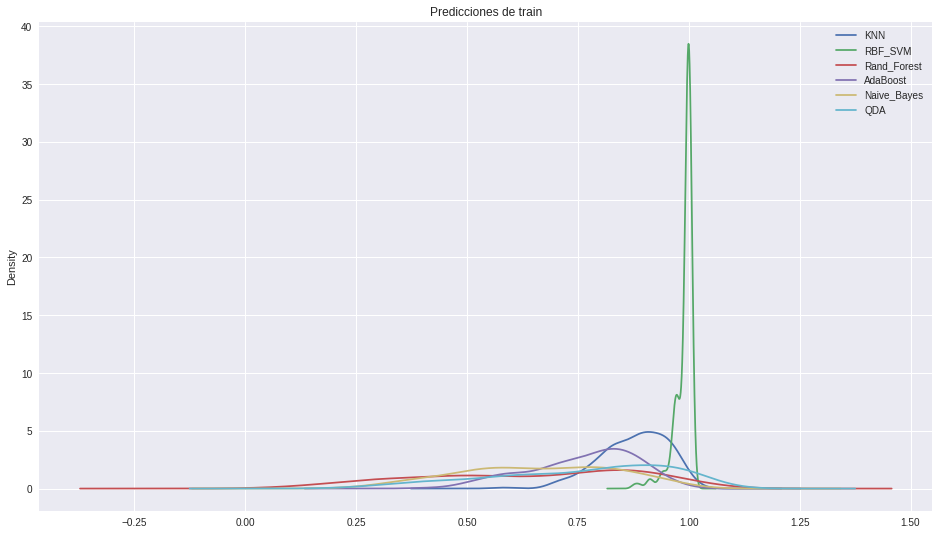

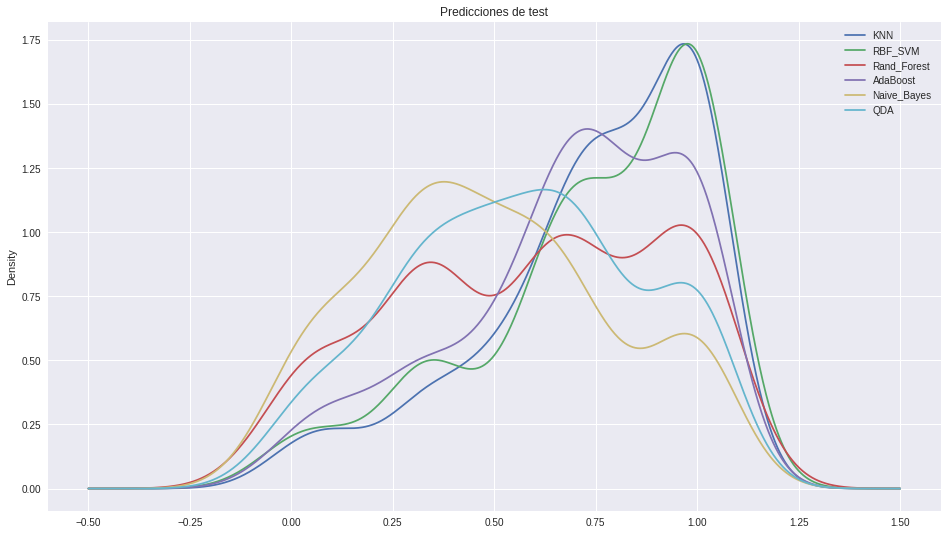

In [6]:
train_results.iloc[:,:-1].plot.density(figsize=(16,9), title="Predicciones de train")
test_results.iloc[:,:-1].plot.density(figsize=(16,9), title="Predicciones de test")

In [0]:
train_valid_items=(train_results.iloc[:,-1]<4)&(train_results.iloc[:,-1]>-4)#~(train_results.iloc[:,-1]==-np.inf)
test_valid_items=(test_results.iloc[:,-1]<4)&(test_results.iloc[:,-1]>-4)#~(test_results.iloc[:,-1]==-np.inf)

In [16]:
predictors

['KNN', 'RBF_SVM', 'Rand_Forest', 'AdaBoost', 'Naive_Bayes', 'QDA']

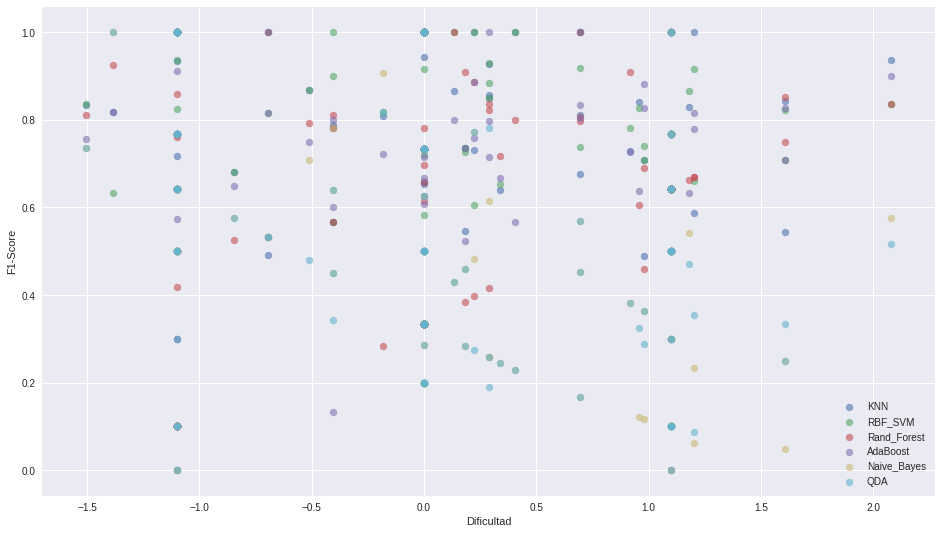

In [35]:
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(1, 1, 1)

for pred in predictors:
  x_vals=test_results.loc[test_valid_items,"IRT_difficulty"]
  y_vals=test_results.loc[test_valid_items,pred]
  ax.scatter(x=x_vals,
             y=y_vals,
             alpha=.6, label=pred)
plt.legend(loc='lower right')
plt.xlabel("Dificultad")
plt.ylabel("F1-Score")
plt.show()

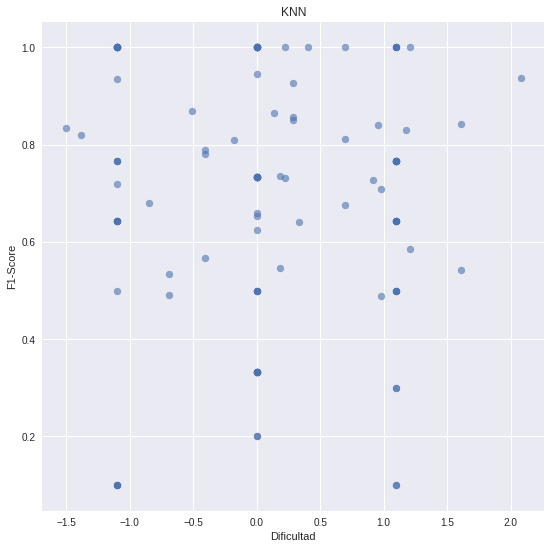

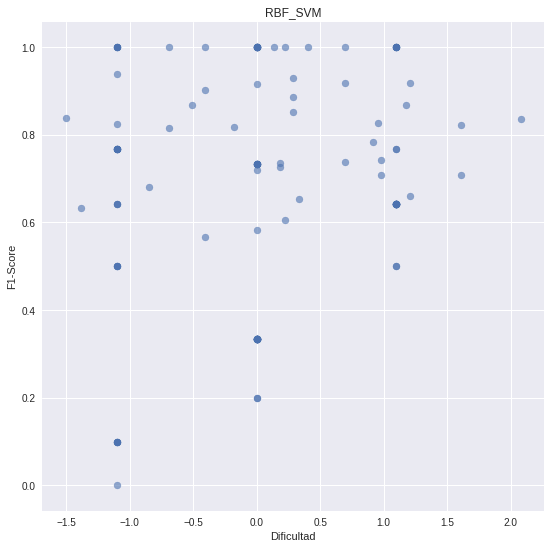

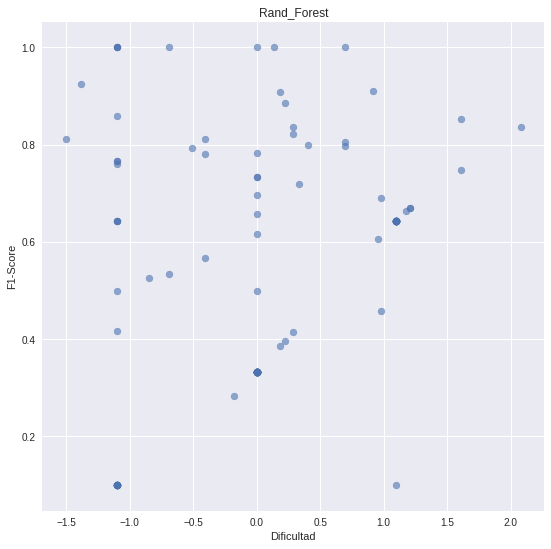

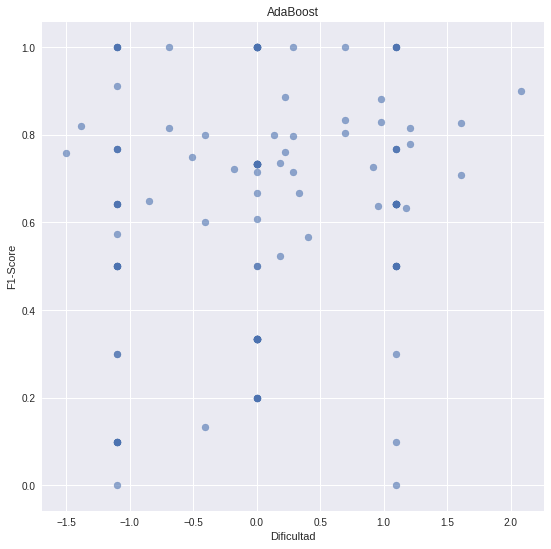

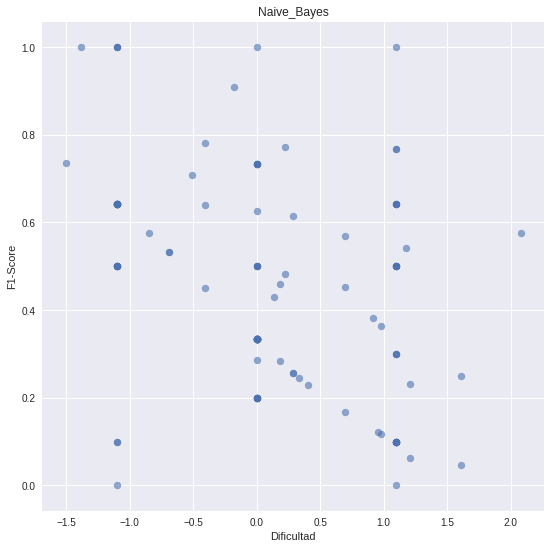

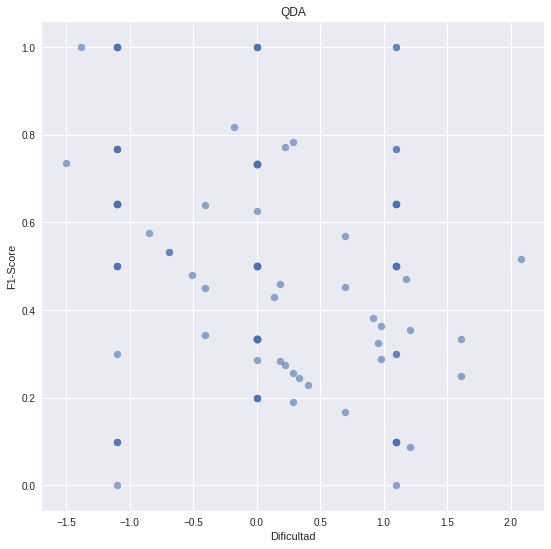

In [78]:
for pred in predictors:
  fig = plt.figure(figsize=(9,9))#16,9))
  ax = fig.add_subplot(1, 1, 1)

  x_vals=(test_results.loc[test_valid_items,"IRT_difficulty"])#test_results.loc[test_valid_items,"IRT_difficulty"]
  y_vals=test_results.loc[test_valid_items,pred]
  ax.scatter(x=x_vals,
             y=y_vals,
             alpha=.6, label=pred)
  
#   plt.legend(loc='lower right')
  plt.xlabel("Dificultad")
  plt.ylabel("F1-Score")
  plt.title(pred)
  plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6cc0e024a8>,
      dtype=object)

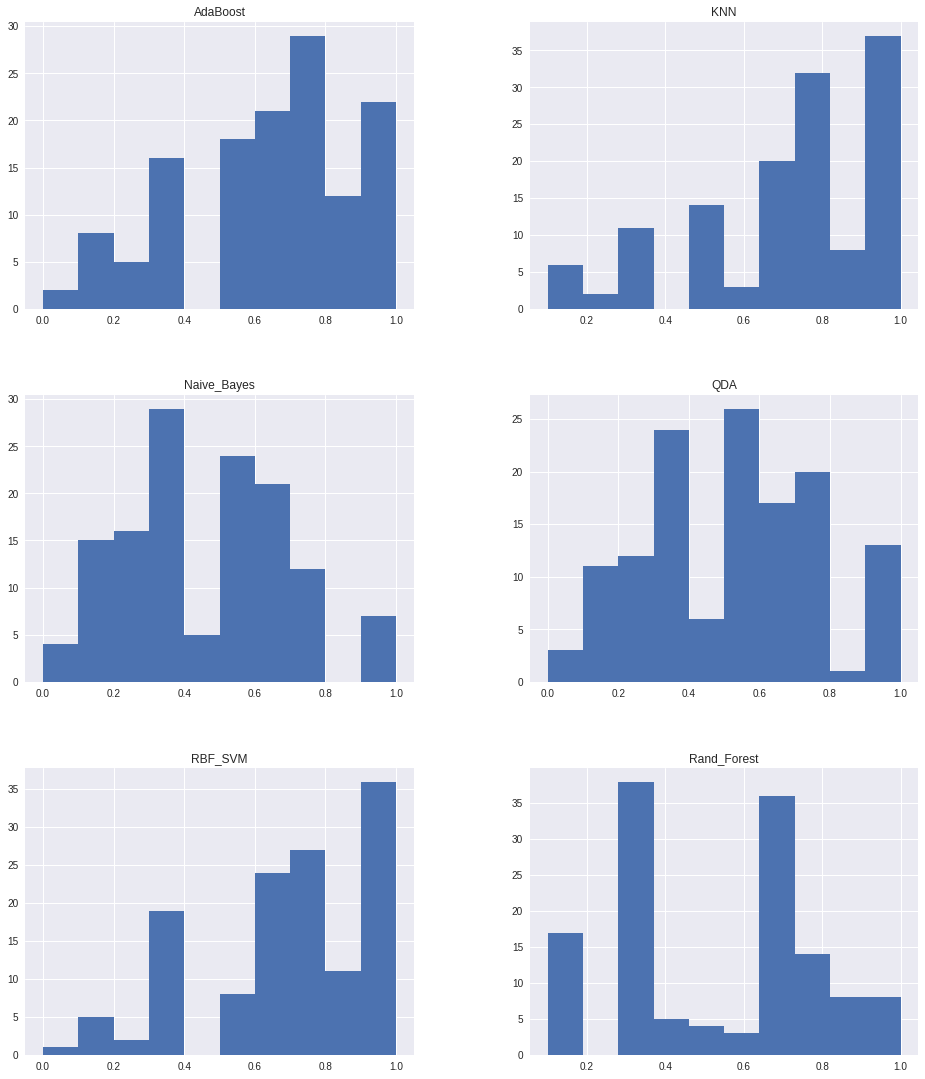

In [80]:
test_results.iloc[:,:-1][test_valid_items].hist(figsize=(16,19))